# Plotting Basytec (or any) csv file

This notebook shows a simple script to read in CSV files to a pandas dataframe. Plotting is possible directly from the dataframe but instead here the data is passed to lists with more useful names.

If you would like a complete python script with much more plotting options (for publication, say), get in touch!

## Assumption on data format
1. Comments are preceded by a tilde ~ (setting in Basytec ASCII export window)
2. Time is in seconds (a hard-coded multiplication is needed below to correct the time data.... not sure why)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in csv file
# set your path here
filename = "C:/Users/Teddy/Dropbox/IMPACT/Toshiba_cell_Testing/data/BaSyTec_NP2211F10FHBJ_46_discharge_1C_capacity.txt"
df=pd.read_csv(filename, sep=',',comment='~',encoding = "ISO-8859-1")

Pandas retains the easy-to-view table of data like you might see in excel

In [3]:
df[0:5]

,Time[s],DataSet,t-Step[s],t-Set[s],Line,Command,U[V],I[A],Ah[Ah],Ah-Step,Wh[Wh],T1[°C],Cyc-Count,State,temp_cell_surf[°C],temp_neg_term[°C],temp_pos_term[°C]
0,0.000000,1,0.000000,0.000000,2,Pause,2.247745,0.0,0.0,0.0,0.0,21.32906,1,3,21.14658,21.1253,21.20437
1,17.997285,2,17.997285,17.997285,2,Pause,2.245712,0.0,0.0,0.0,0.0,21.32906,1,0,21.14658,21.1253,21.20437
2,3599.993966,3,3599.993966,3599.993966,2,Pause,2.248649,0.0,0.0,0.0,0.0,21.32906,1,1,21.14658,21.1253,21.20133
3,7200.006034,4,7200.006034,7200.006034,2,Pause,2.248649,0.0,0.0,0.0,0.0,21.32906,1,1,21.14658,21.1253,21.20285
4,10800.000000,5,10800.000000,10800.000000,2,Pause,2.248649,0.0,0.0,0.0,0.0,21.32906,1,1,21.14658,21.1253,21.20437


The dataframe allows columns of data to be identified by their heading

Text(0.5,1,'Charge, discharge then charge to SRP')

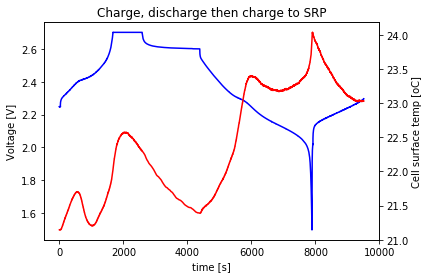

In [4]:
# this is where you can define the quantities you want based on the table above
dummy = df.loc[:,'Time[s]'] # identify the relevant column based on its header
time = dummy.values
time = time/3600.

dummy = df.loc[:,'U[V]']
voltage = dummy.values

dummy = df.loc[:,'I[A]']
current = dummy.values

dummy = df.loc[:,'temp_cell_surf[°C]']
T_cell_surf = dummy.values

dummy = df.loc[:,'T1[°C]']
T_amb = dummy.values

dummy = df.loc[:,'temp_neg_term[°C]']
T_neg = dummy.values

dummy = df.loc[:,'temp_pos_term[°C]']
T_pos = dummy.values

fig1, ax1 = plt.subplots()
ax1.plot(time,voltage,'b')
plt.xlabel('time [s]')
plt.ylabel('Voltage [V]')
ax2 = ax1.twinx()
ax2.plot(time,T_cell_surf,'r')
plt.ylabel('Cell surface temp [oC]')
plt.title('Charge, discharge then charge to SRP')

Text(0.5,1,'Charge, discharge then charge to SRP')

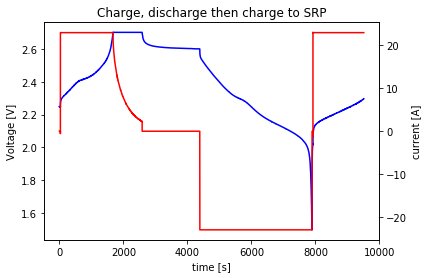

In [5]:
fig2, ax1 = plt.subplots()
ax1.plot(time,voltage,'b')
plt.xlabel('time [s]')
plt.ylabel('Voltage [V]')
ax2 = ax1.twinx()
ax2.plot(time,current,'r')
plt.ylabel('current [A]')
plt.title('Charge, discharge then charge to SRP')

Text(0.5,1,'Charge, discharge then charge to SRP')

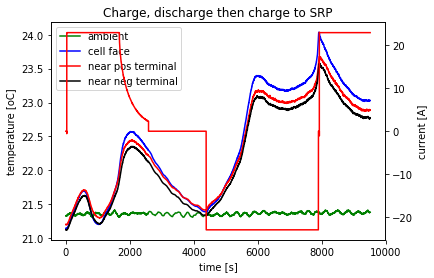

In [6]:

fig3, ax1 = plt.subplots()
ax1.plot(time,T_amb,'g',label='ambient')
ax1.plot(time,T_cell_surf,'b',label='cell face')
ax1.plot(time,T_pos,'r',label='near pos terminal')
ax1.plot(time,T_neg,'k',label='near neg terminal')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('temperature [oC]')
ax2 = ax1.twinx()
ax2.plot(time,current,'r')
plt.ylabel('current [A]')
plt.title('Charge, discharge then charge to SRP')